In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.mplot3d import Axes3D
import requests

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
baseURL = 'http://pds-imaging.jpl.nasa.gov/w10n/'
dataURL = 'mer1-m-pancam-2-edr-ops-v1.0/mer1po_0xxx/data/'
product = 'edr'
formatURL = '?output=json'

data = {}
for sol in range(730,732):
    data[sol] = {}

for sol in data.keys():
    print sol
    URL = '{baseURL}{dataURL}sol{sol}/{product}/'.format(baseURL=baseURL, dataURL=dataURL,
                                                         sol='{0:0>4}'.format(sol), product=product)
    try:
        allimg = requests.get(URL+formatURL).json()
        for img in allimg['leaves']:
            if 'eff' in img['name']:
                seq = img['name'][-13:-7]
                if not seq in data[sol].keys():
                    data[sol][seq] = [img['name']]
                else:
                    data[sol][seq]+=[img['name']]
    except:
        print URL+formatURL

#for sol in data.keys():
#    print sol
#    for seq in data[sol].keys():
#        nimg = len(data[sol][seq])
#        if nimg>1:
#            print seq
#            for img in data[sol][seq]:
#                print img

730
731


In [41]:
sol = 731
seq = 'p2537r'
imgs = None
R = np.zeros((len(data[sol][seq]),1016*1016))
for i,filename in enumerate(data[sol][seq]):
    print filename
    URL = '{baseURL}{dataURL}sol{sol}/{product}/{filename}/0/raster/data[]{formatURL}'.format(baseURL=baseURL,
            dataURL=dataURL, sol='{0:0>4}'.format(sol), product=product, filename=filename, formatURL=formatURL)
    try:
        img = np.array(requests.get(URL).json()['data'])
    except:
        print 'Unable to retrieve from: {URL}'.format(URL=URL)
    if i==3:
        print 'Adding a fake cosmic ray to img #3 at pixel location [800,400]'
        img[798:802,398:402] = 255
    fimg = img[4:-4,4:-4].flatten()
    R[i]=fimg
    print R.shape, fimg.shape
        
print R.shape


1p193079068eff64lqp2537r1m1.img
(7, 1032256) (1032256,)
1p193079088eff64lqp2537r2m1.img
(7, 1032256) (1032256,)
1p193079109eff64lqp2537r3m1.img
(7, 1032256) (1032256,)
1p193079130eff64lqp2537r4m1.img
Adding a fake cosmic ray to img #3 at pixel location [800,400]
(7, 1032256) (1032256,)
1p193079155eff64lqp2537r5m1.img
(7, 1032256) (1032256,)
1p193079185eff64lqp2537r6m1.img
(7, 1032256) (1032256,)
1p193079324eff64lqp2537r7m1.img
(7, 1032256) (1032256,)
(7, 1032256)


In [42]:
N = R.shape[0]
ix = np.array(np.random.uniform(low=0,high=1048576,size=10000),dtype='int32')
print ix
for i in range(N):
    for j in range(N):
        if i==j:
            continue
        #plt.figure(figsize=(10,10))
        #plt.title('{i}x{j}'.format(i=i,j=j))
        #plt.plot(R[i,:][ix],R[j,:][ix],'.',alpha=0.25,color='k',markersize=5)

[530239 297267 474630 ...,  93211 693442 562288]


In [43]:
K,N = np.shape(R)
S = np.cov(R)
ls,Phi = np.linalg.eigh(S)
#reverse ls & Phi (by cols):
ls = ls[::-1]
Phi = (Phi.T[::-1]).T
#normalizing factor:
G = np.sqrt(np.diag(1./(N-1)/ls))
#kl transform, normalization & clipping
Z = np.dot(Phi.T,R)
Zn = np.dot(G,Z)

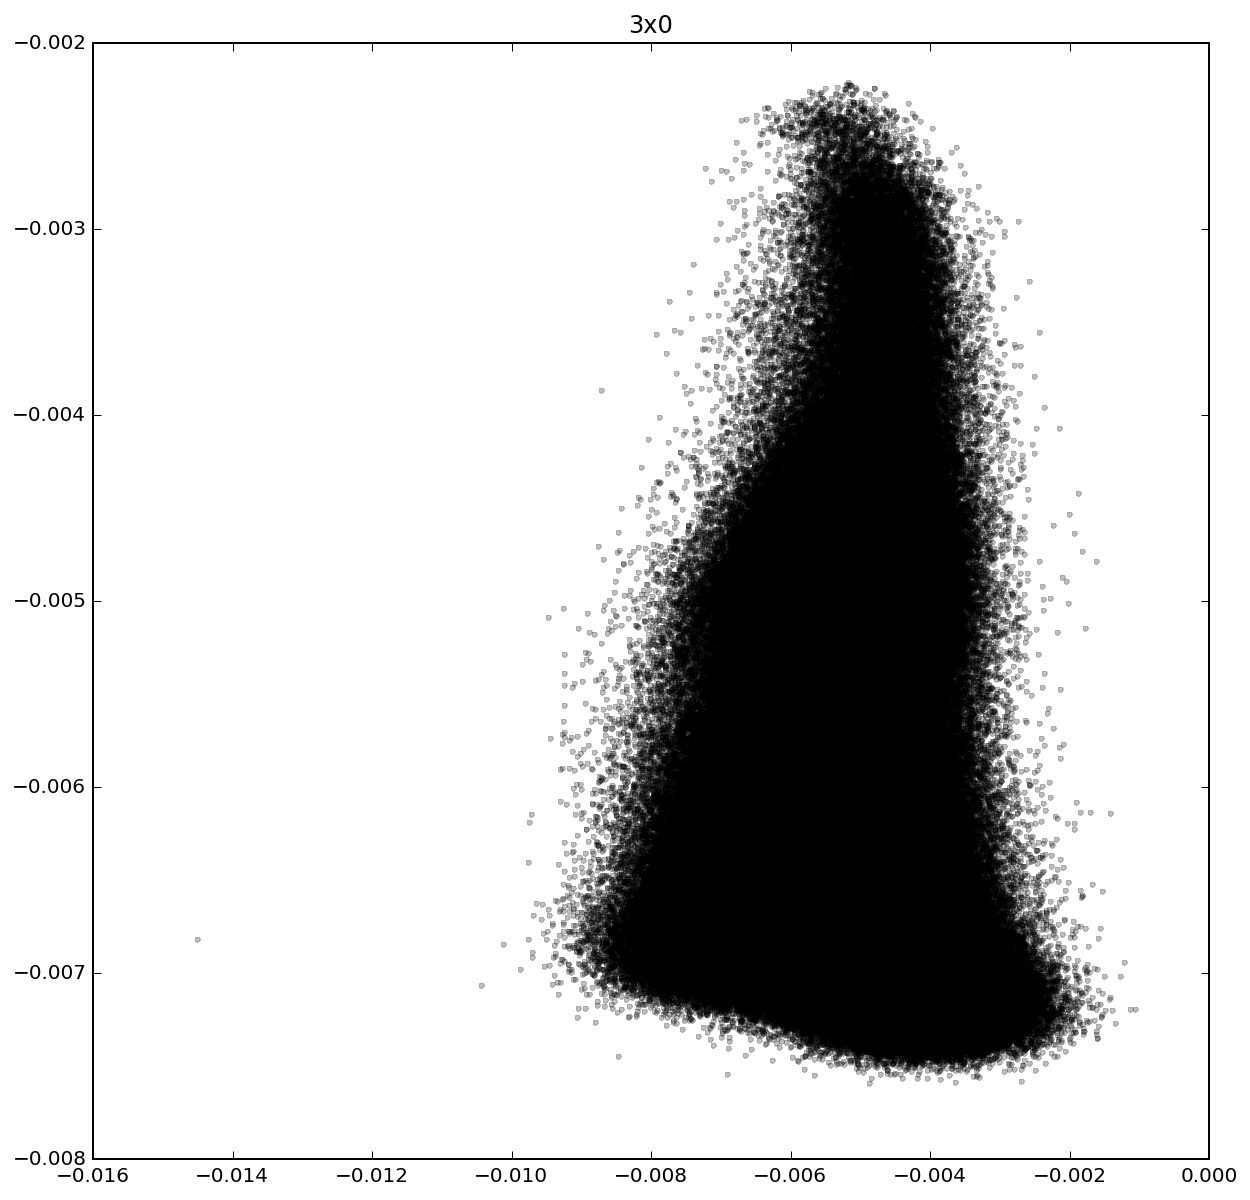

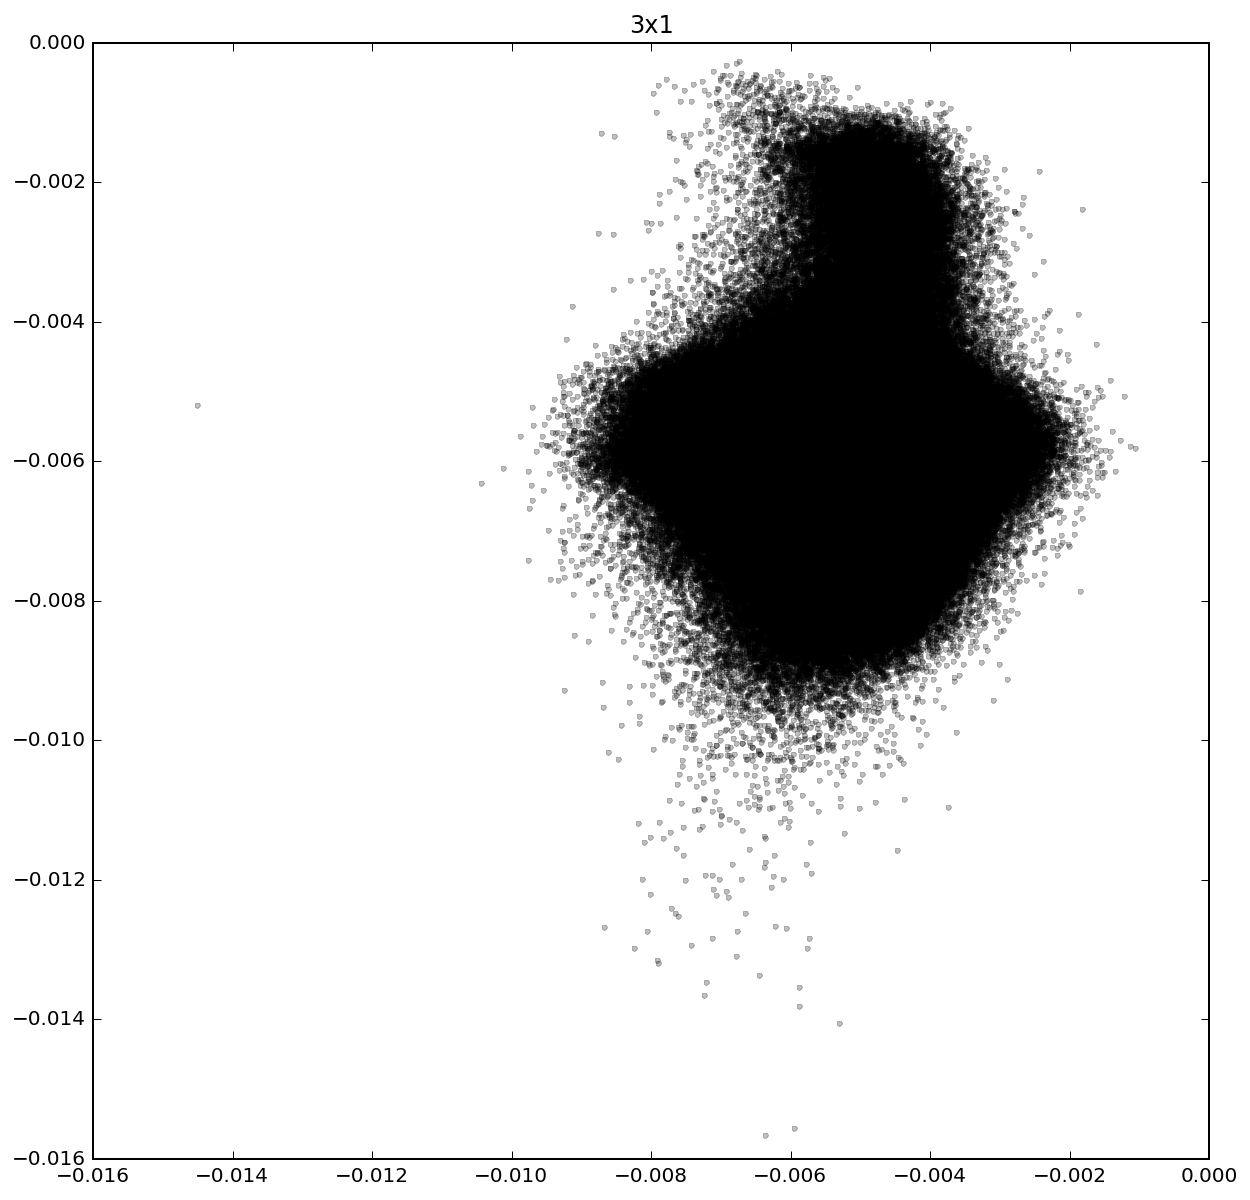

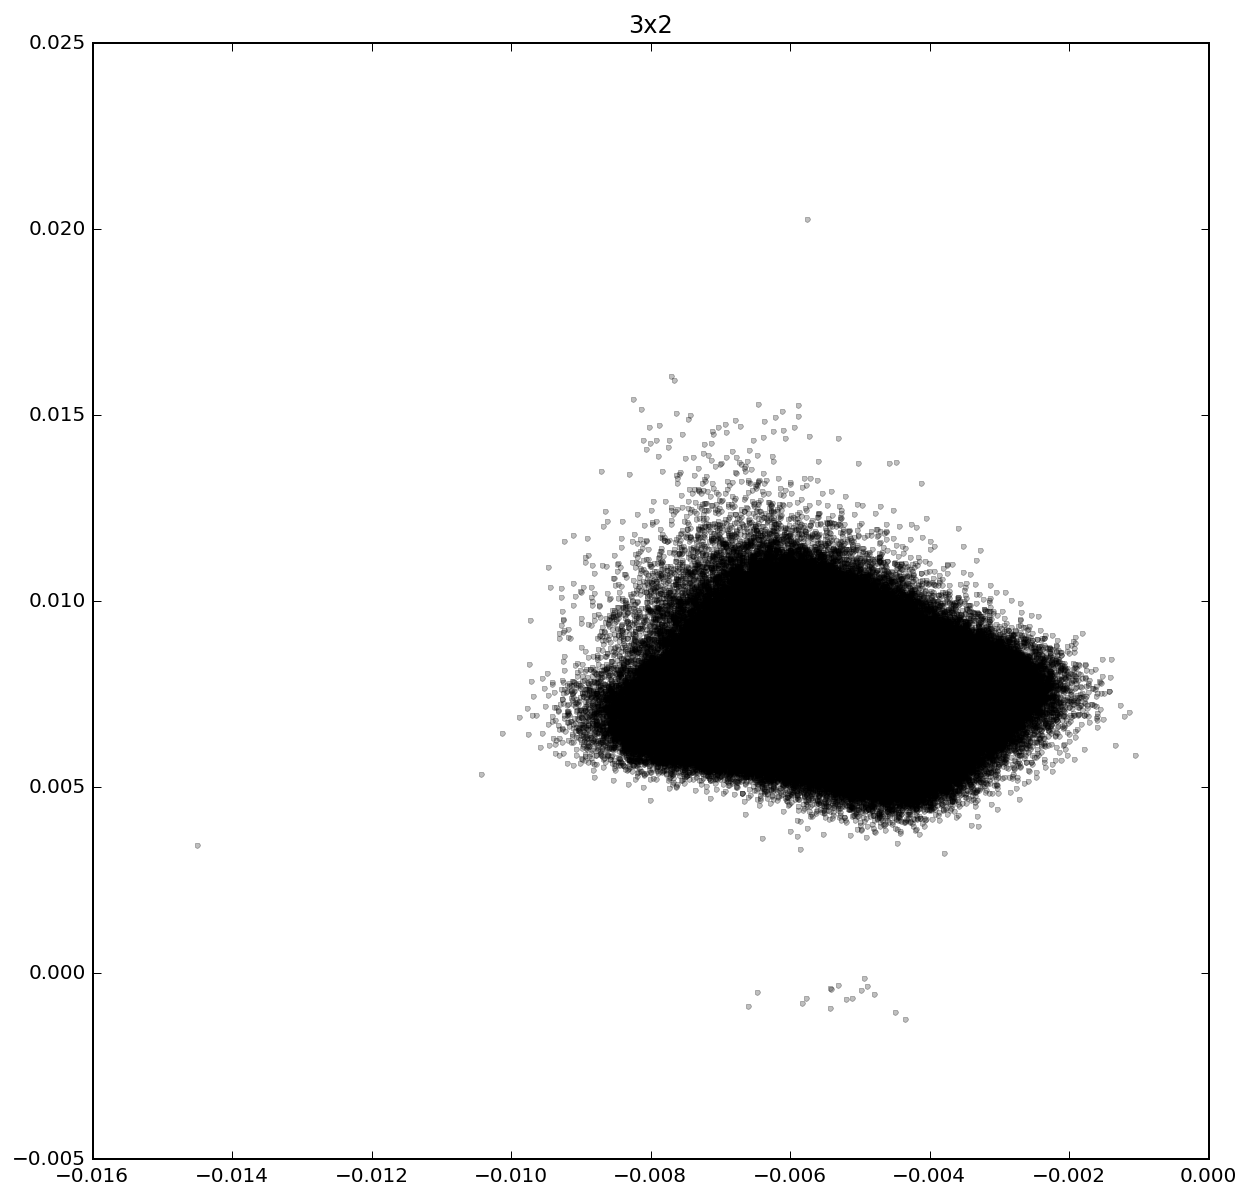

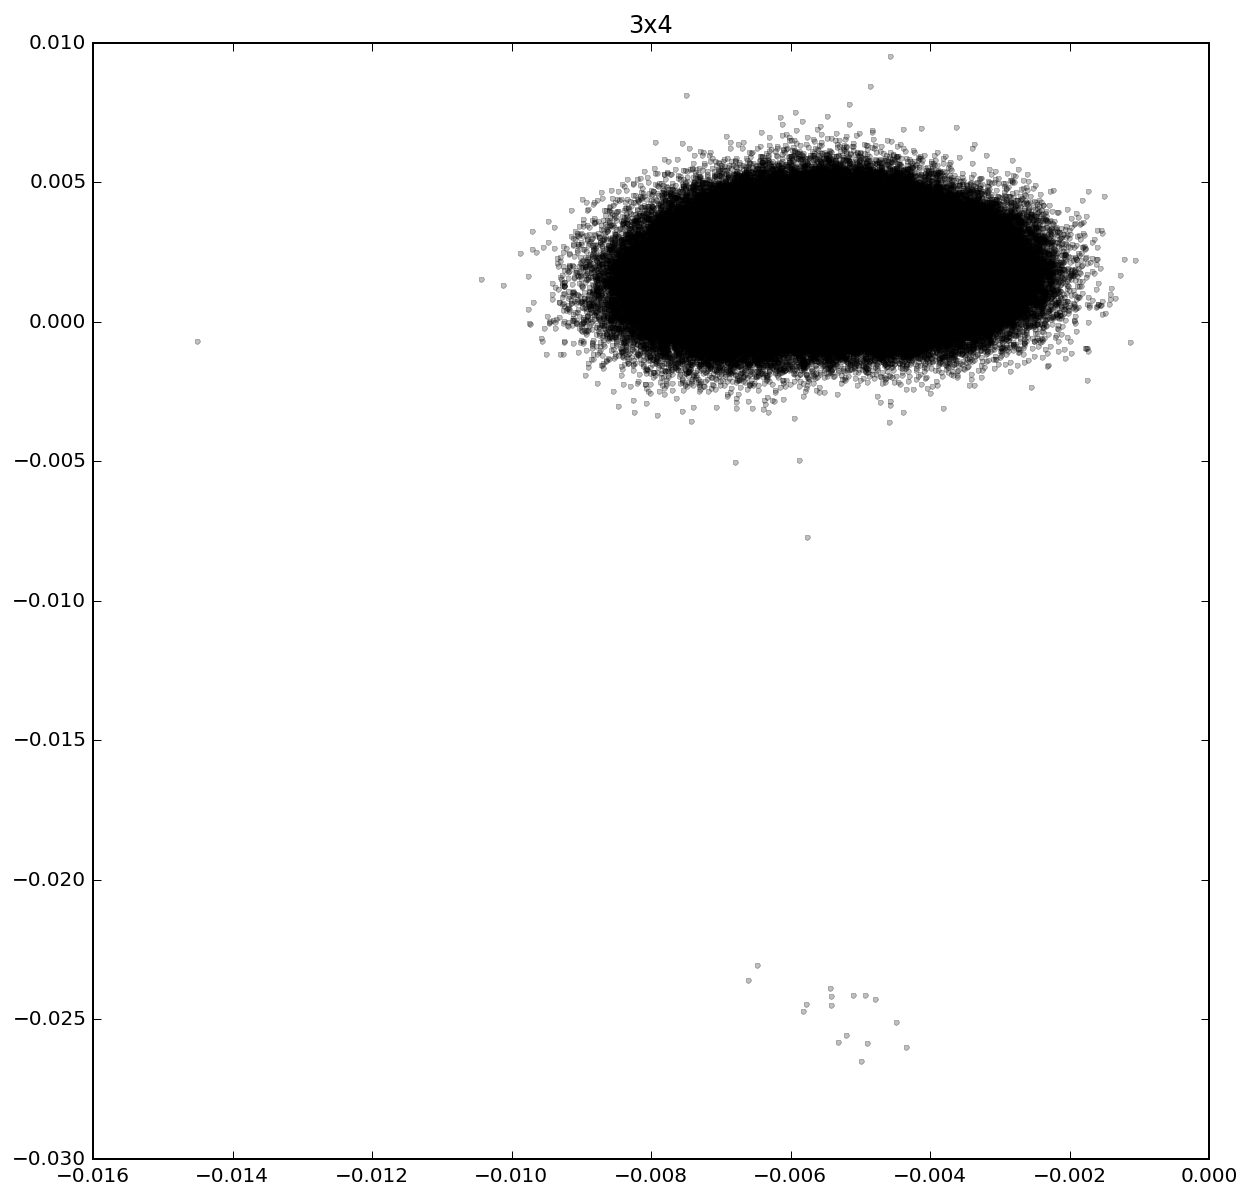

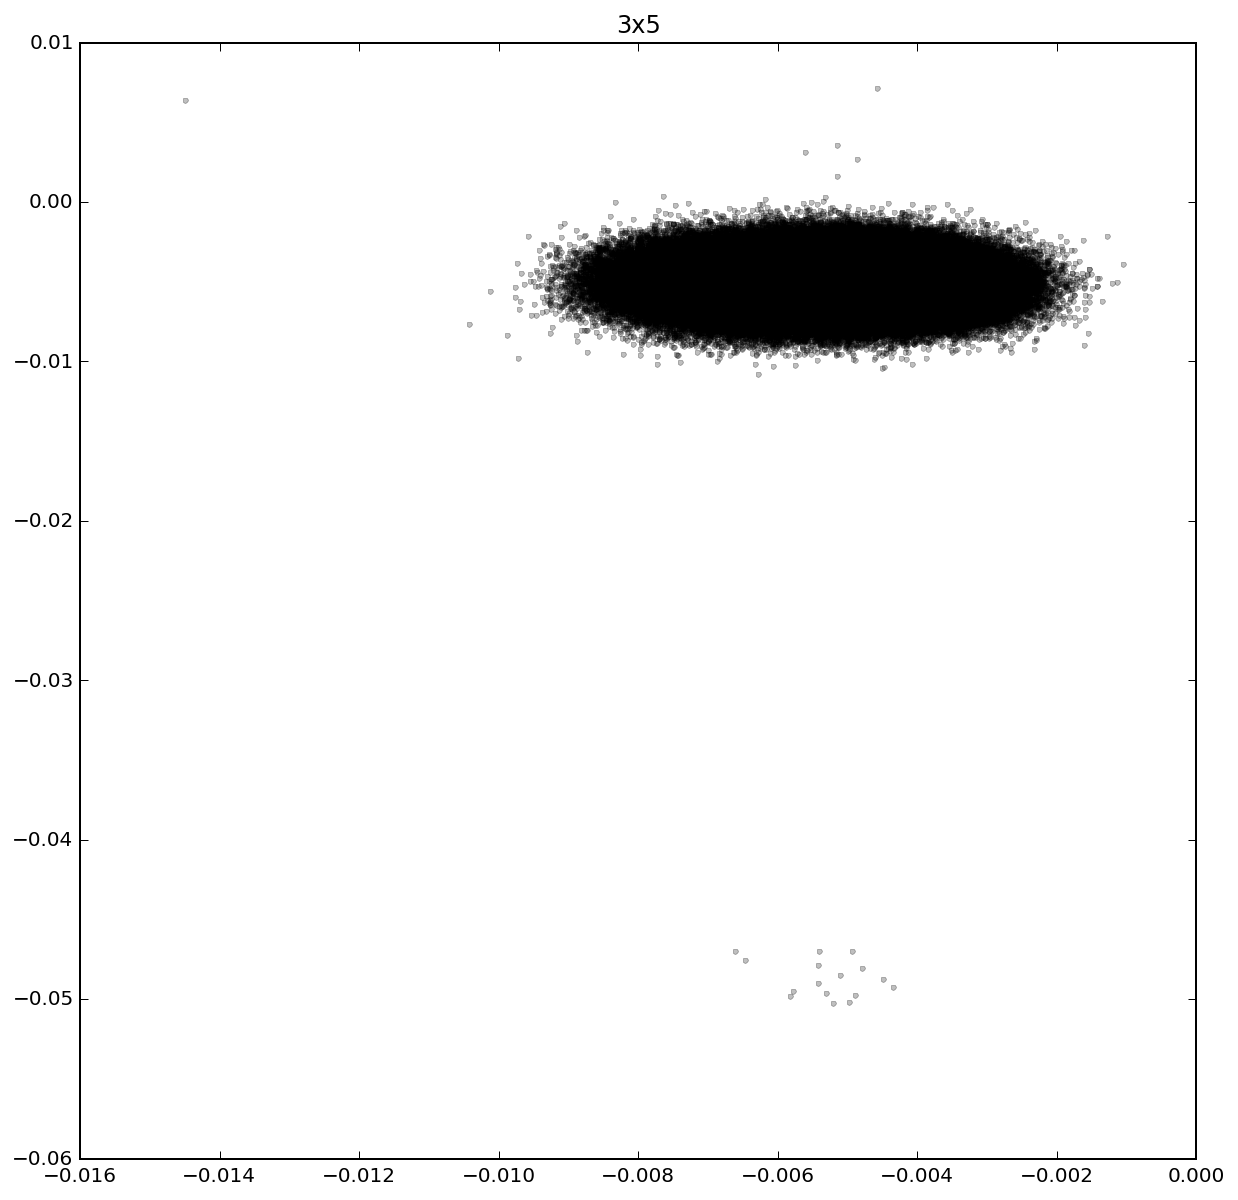

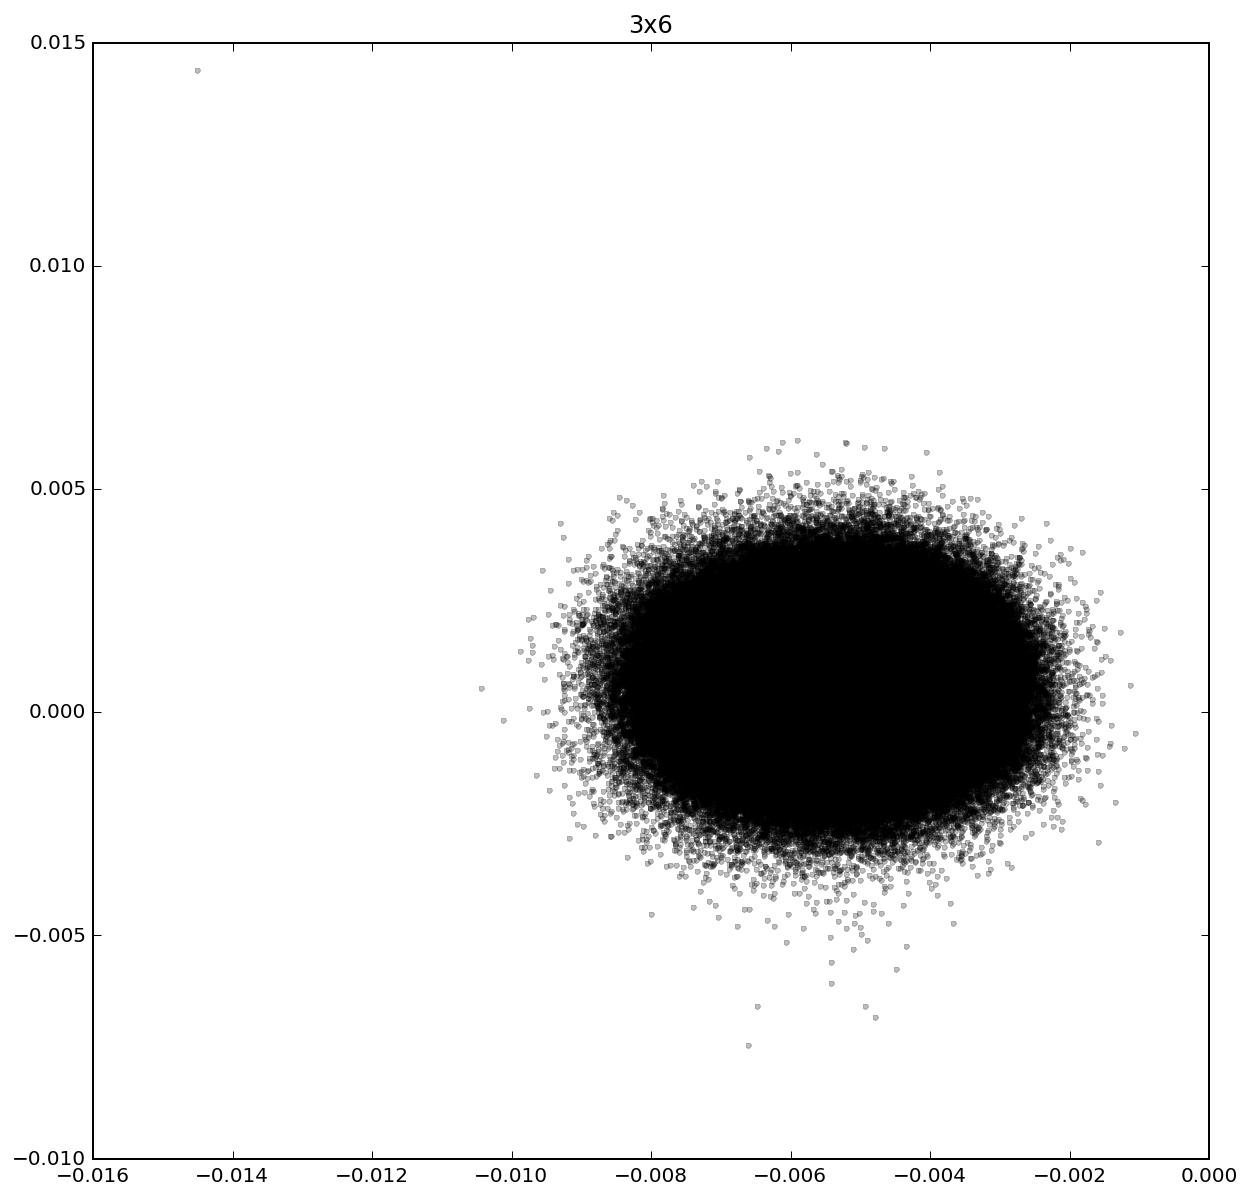

In [44]:
N = Zn.shape[0]
for i in range(N):
    for j in range(N):
        if i==j:
            continue
        if i!=3:
            continue
        plt.figure(figsize=(10,10))
        plt.title('{i}x{j}'.format(i=i,j=j))
        #plt.axes([0,R.max(),0,R.max()])
        plt.plot(Zn[i,:],Zn[j,:],'.',alpha=0.25,color='k',markersize=5)